### Model Comparison

In [19]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    roc_auc_score, roc_curve, precision_recall_curve
)

# Load pipelined models
with open("log-regression.pkl", "rb") as f:
    model_log = pickle.load(f)

with open("random-forest.pkl", "rb") as f:
    model_rf = pickle.load(f)

with open("xgb_model.pkl", "rb") as f:
    model_xgb = pickle.load(f)


In [20]:
df = pd.read_csv('cleaned_income_evaluation.csv')
df.head()

df['income'] = df['income'].apply(lambda x: 0 if x.strip() == "<=50K" else 1)

In [21]:
X=df.drop(columns=["income"])
Y=df["income"]

In [22]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, train_size=0.8, random_state=42)

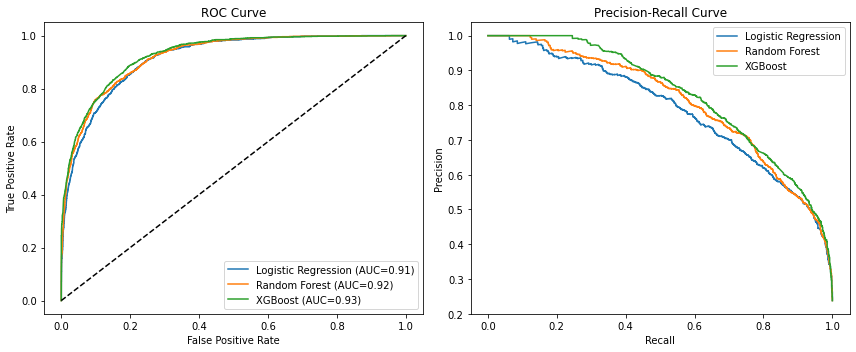

                 Model  Accuracy  F1 Score  Precision    Recall   ROC AUC
0  Logistic Regression  0.859333  0.674864   0.750000  0.613412  0.914210
1        Random Forest  0.869035  0.695304   0.778956  0.627876  0.920742
2              XGBoost  0.875763  0.710219   0.798195  0.639711  0.927628


In [27]:
models = {
    "Logistic Regression": model_log,
    "Random Forest": model_rf,
    "XGBoost": model_xgb
}

results = []

plt.figure(figsize=(12, 5))

for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "F1 Score": f1,
        "Precision": precision,
        "Recall": recall,
        "ROC AUC": roc_auc
    })

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.2f})")

    # Precision-Recall Curve
    prec, rec, _ = precision_recall_curve(y_test, y_proba)
    plt.subplot(1, 2, 2)
    plt.plot(rec, prec, label=f"{name}")

    # Plot ROC Curve
plt.subplot(1, 2, 1)
plt.plot([0, 1], [0, 1], "k--")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

# Plot Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()

plt.tight_layout()
plt.show()

# Display metrics table
df_results = pd.DataFrame(results)
print(df_results)